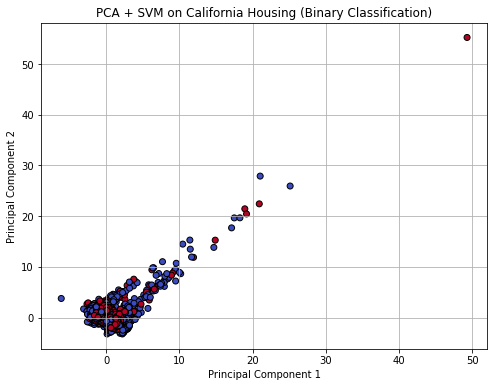

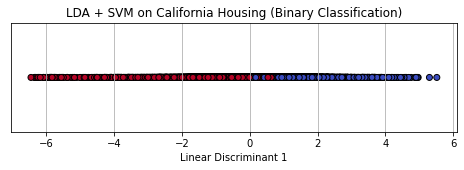

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Convert to binary classification (High = 1 if price > median)
y_binary = (y > np.median(y)).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)# Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train SVM on PCA-reduced data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_pca, y_train)

# Plot PCA + SVM
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('PCA + SVM on California Housing (Binary Classification)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()# Apply LDA (1 component since it's binary classification)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)

# Train SVM on LDA-reduced data
svm_lda = SVC(kernel='linear')
svm_lda.fit(X_lda, y_train)

# Plot LDA + SVM
plt.figure(figsize=(8, 2))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda), c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('LDA + SVM on California Housing (Binary Classification)')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])
plt.grid(True)
plt.show()